In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/Medium_AggregatedData.csv', sep=',')

In [3]:
df.shape

(279577, 50)

In [4]:
df = df[df['language']=='en']

In [5]:
df_useful_columns = df.drop(['audioVersionDurationSec', 'codeBlockCount','isSubscriptionLocked','publicationdescription','publicationdomain','publicationfacebookPageName','publicationfollowerCount','publicationname','publicationpublicEmail',
                                                              'publicationslug','publicationtags','bio','userId','userName','usersFollowedByCount','usersFollowedCount','scrappedDate','codeBlock', 'publicationtwitterUsername', 'author'], axis=1)

In [6]:
df_drop_duplicate = df_useful_columns.drop_duplicates(subset='postId')

In [7]:
df_drop_duplicate.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,tagsCount,totalClapCount,wordCount,postCount
count,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000
mean,3.550136,6.606478,3.983713,25.196113,0.902757,0.069931,4.299940,173.135026,922.495089,60063.094908
std,5.399172,11.746137,3.506808,277.391004,14.940658,0.292918,1.203037,1891.890063,871.067923,61242.502841
min,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.920755,0.000000,0.000000,0.000000,4.000000,0.000000,421.000000,30322.000000
50%,2.000000,4.000000,3.180189,2.000000,0.000000,0.000000,5.000000,6.000000,720.000000,51320.000000
75%,4.000000,8.000000,5.011557,8.000000,0.000000,0.000000,5.000000,65.000000,1158.000000,66154.000000
max,263.000000,1180.000000,99.603774,42288.000000,3076.000000,3.000000,6.000000,291706.000000,24964.000000,331914.000000


In [8]:
df_drop_duplicate.to_csv('Data/dropduplicate.csv', sep=',')

In [9]:
df_dummy = df_drop_duplicate.head(3)

In [10]:
df_dummy

,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,language,latestPublishedDate,latestPublishedDatetime,linksCount,...,uniqueSlug,updatedDate,updatedDatetime,url,vote,wordCount,tag_name,slug,name,postCount
0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,en,2018-09-18,2018-09-18 20:58:20,1,...,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,Blockchain,blockchain,Blockchain,265164.0
3,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,en,2018-01-07,2018-01-07 17:18:38,24,...,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,Technology,technology,Technology,166125.0
7,NaN,2018-03-08,2018-03-08 07:04:31,2018-03-08,2018-03-08 07:07:42,1,en,2018-03-08,2018-03-08 07:07:42,3,...,ascent-of-data-science-sas-and-big-data-analys...,2018-03-08,2018-03-08 07:07:42,https://medium.com/s/story/ascent-of-data-scie...,False,533,Data Science,data-science,Data Science,33617.0


In [11]:
df_dummy.to_csv('Data/shortdummy.csv',sep=',')

In [7]:
tag = df_useful_columns.groupby('tag_name').size().sort_values(ascending=False)[:10]
top = list(tag.index)
value = list(tag.values)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

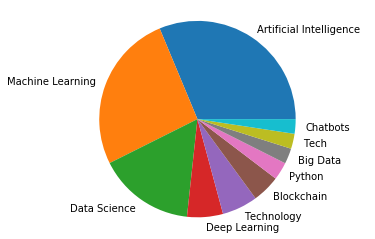

In [9]:
plt.pie(value, labels=top)
plt.axis('equal')
plt.show()

In [11]:
(tag)

tag_name
Artificial Intelligence    32824
Machine Learning           27383
Data Science               16689
Deep Learning               6194
Technology                  6163
Blockchain                  4801
Python                      3075
Big Data                    2670
Tech                        2599
Chatbots                    2515
dtype: int64

In [46]:
pd.DataFrame(df_useful_columns['totalClapCount']).to_csv('clap.csv')

In [16]:
df[df['postId']=='100139913e4c'].to_csv('Data/same2.csv',sep=',')

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [18]:
text = ""
for ind, row in df_drop_duplicate.iterrows():
    text += str(row["title"]) + " "
text = text.strip()

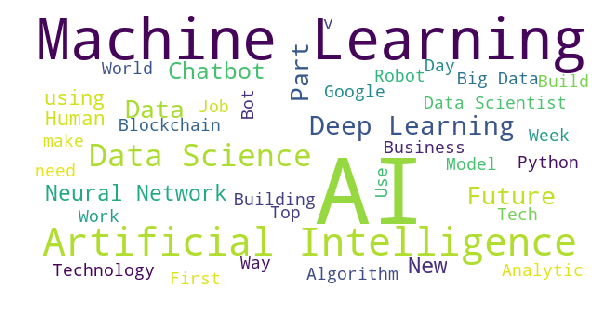

In [19]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
df_test = df_drop_duplicate[df_drop_duplicate['totalClapCount']!=0]

In [52]:
df_new = df_test.groupby('totalClapCount').size()

/Users/devashish/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/devashish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


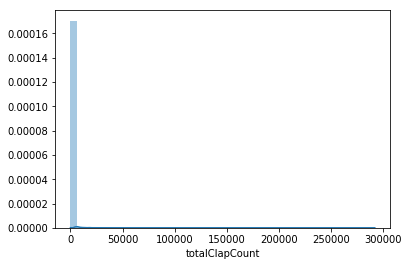

In [53]:
sns.distplot(df_test['totalClapCount'])

In [54]:
df_new

totalClapCount
1         5707
2         2410
3         1677
4         1092
5         1125
6          859
7          697
8          571
9          538
10         805
11         628
12         512
13         456
14         372
15         446
16         368
17         338
18         335
19         245
20         363
21         320
22         287
23         266
24         217
25         248
26         237
27         205
28         185
29         185
30         236
          ... 
30696        1
30749        1
32693        1
33098        1
33856        1
35046        1
35192        1
35232        1
35861        1
36504        1
38255        1
38688        1
39376        1
39977        1
41280        1
42710        1
44713        1
46233        1
46490        1
47445        1
47953        1
49838        1
53707        1
58673        1
67949        1
79766        1
80886        1
112595       1
200357       1
291706       1
Length: 2300, dtype: int64

In [32]:
df_drop_duplicate['text']

0         Private Business, Government and Blockchain\n\...
3         EPQ draft 1 (4844 words)\nhttps://upload.wikim...
7         Ascent of data Science, SAS and Big data Analy...
11        Can a robot love us better than another human ...
16        2017 Big Data, AI and IOT Use Cases\nAn Active...
25        Artificial Intelligence is the Next Frontier\n...
26        Aidoc Gets CE Mark for Deep Learning Solution\...
31        Ai and it’s impact on the world\n\n\nActually ...
32        The Meta Model and Meta Meta-Model of Deep Lea...
36        Top 10 Tips for the Data Science Team To Succe...
39        Don’t trust “Do you trust this computer”\nfrom...
44        The Cultural Revolution: Robots and Trust\n\nI...
49        A Little Snippet to Automate Web Scraping usin...
54        \nProduct Release Wrap-up July\nOur new Unleas...
57        AI Saturdays by AiDevNepal : A Review from par...
58        Is the age of theory over as Machine Learning ...
61        AI based UI Development (AI-UI

In [33]:
df_drop_duplicate['text'].to_csv('train.txt', index=False)

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 5

/Users/devashish/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
path = 'train.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 368321007


In [50]:
text = text[:1000000]

In [51]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'unique chars: {len(chars)}')

unique chars: 161


In [52]:
SEQUENCE_LENGTH = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - SEQUENCE_LENGTH, step):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])
print(f'num training examples: {len(sentences)}')

num training examples: 333320


In [53]:
sentences[100]

'ide to use it in their work and conclude'

In [54]:
next_chars[100]

' '

In [55]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [56]:
X[0][0]

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [57]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [58]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.05, batch_size=128, epochs=5, shuffle=True).history

Train on 316654 samples, validate on 16666 samples
Epoch 1/5
316654/316654 [==============================] - 420s 1ms/step - loss: 1.4760 - acc: 0.5669 - val_loss: 1.6071 - val_acc: 0.5457
Epoch 2/5
116736/316654 [==========>...................] - ETA: 4:06 - loss: 1.4514 - acc: 0.5729

In [ ]:
model.save('rnn.h5')
pickle.dump(history, open("history.p", "wb"))

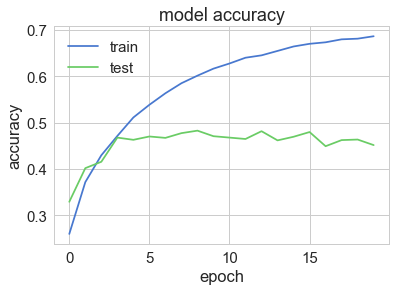

In [40]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

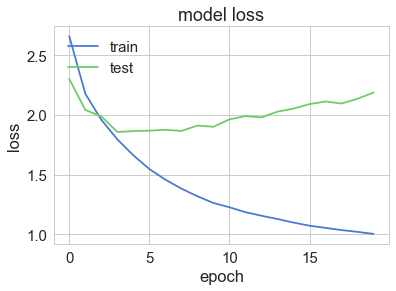

In [41]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [42]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [43]:
prepare_input("This is an example of input for our LSTM".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [44]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [45]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [46]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [47]:
quotes = ['A major private IT company implements blockchain, artificial intelligence, and Internet of Things t',
         'imits. The future could take one of two shapes; a utopian won',
         'The first question that must be answered in this topic is how much automation ',
         'As we can see from the graph the results of automation studies ']

In [48]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

a major private it company implements bl
['otec ', 'ivem ', 'use ', 'gtofic.\naut ', ' seetion ']

imits. the future could take one of two 
['succress ', 'medical ', 'less ', 'great ', 'process. ']

the first question that must be answered
[' to ', '. ', 'ges.\n\nsor ', 'y ', ', ']

as we can see from the graph the results
[' and ', ', ', '.\nthe ', '\ns ', 'itist ']

